In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,6)

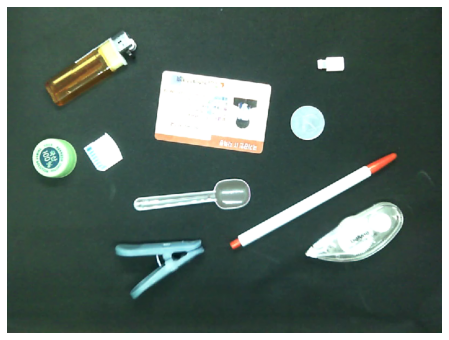

In [2]:
IMG_PATH = "../data/test.png"
img = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)
plt.axis('off'); plt.imshow(img); plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = img[...,2]

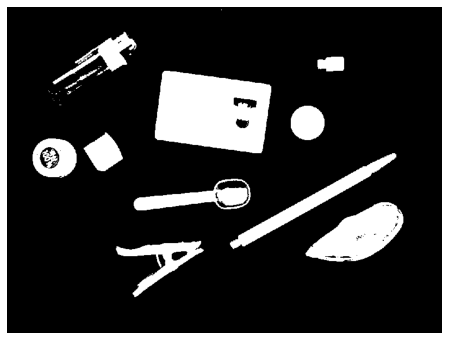

In [3]:
_, img_th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(img_th, cmap='gray')
plt.show()

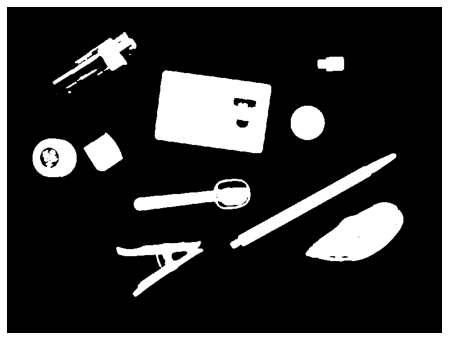

In [4]:
img_br = cv2.GaussianBlur(img, (5, 5), 0)
_, img_th = cv2.threshold(img_br, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(img_th, cmap='gray')
plt.show()

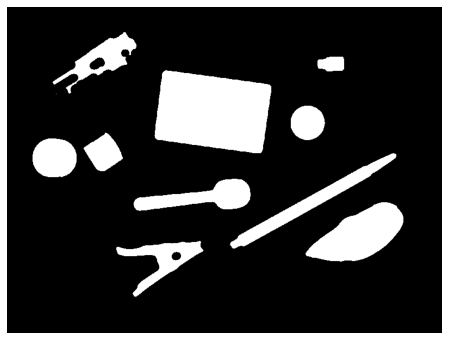

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
img_mp = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, kernel)
plt.axis('off')
plt.imshow(img_mp, cmap='gray')
plt.show()

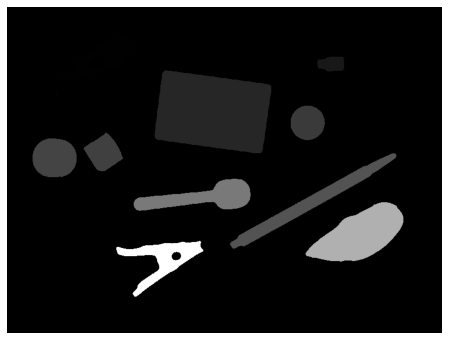

In [12]:
img = np.pad(img_mp, 1)
img_out = np.zeros(img.shape)
label = 1
for y in range(1, img.shape[0]):
    for x in range(1, img.shape[1] - 1):
        if img[y, x] == 0:
            continue
        nb = np.append(img_out[y-1, x-1:x+2], img_out[y, x-1])
        nb = np.unique(nb)
        nb = np.sort(nb)
        if np.sum(nb) == 0:
            img_out[y,x] = label
            label += 1
        else:
            nb_labels = nb[np.nonzero(nb)]
            min_label = nb_labels[0]
            img_out[y,x] = min_label
            if len(nb_labels) <= 1:
                continue
            for nb_label in nb_labels[1:]:
                img_out[img_out == nb_label] = min_label
img_out = img_out[1:-1,1:-1]
plt.axis('off')
plt.imshow(img_out, cmap='gray')
plt.show()

In [22]:
np.unique(img_out)

array([  0.,   1.,  24.,  38.,  57.,  58.,  64.,  68.,  83., 120., 174.,
       253.])

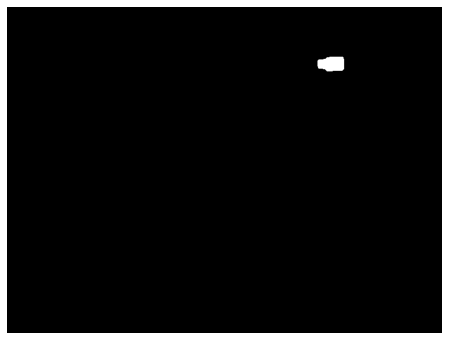

In [24]:
img_out_2 = np.zeros(img_out.shape)
img_out_2[img_out == 24] = 1
plt.axis('off')
plt.imshow(img_out_2, cmap='gray')
plt.show()

In [26]:
area = np.sum(img_out_2)
perimeter = np.

1130.0

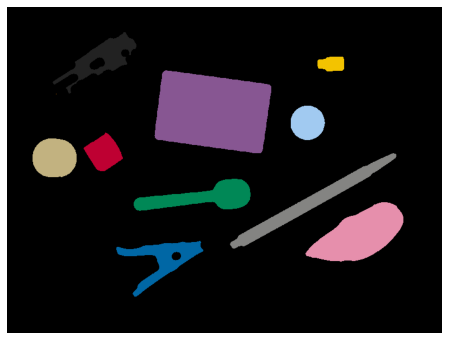

In [72]:
KELLY_COLORS = [
    'F2F3F4', '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032',
    'C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', '604E97',
    'F6A600', 'B3446C', 'DCD300', '882D17', '8DB600', '654522', 'E25822',
    '2B3D26'
]

def hex2rgb(hex):
    return tuple([int(hex[i:i + 2], 16) for i in (0, 2, 4)])


img_out = np.zeros(img_mp.shape + (3, ), dtype=np.uint8)
for idx in range(ret):
    if not idx:
        continue
    img_out[labels == idx] = hex2rgb(KELLY_COLORS[idx])

plt.axis('off')
plt.imshow(img_out, cmap='gray')
plt.show()

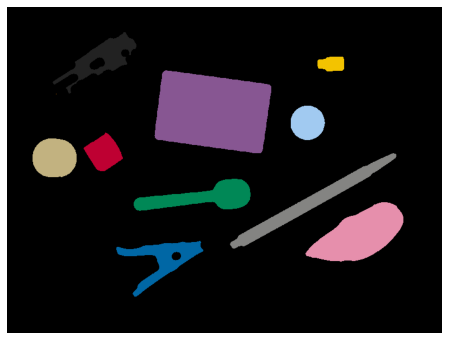

area: 5234.5, perimeter: 535.1442233324051
area: 11194.5, perimeter: 468.80107748508453
area: 6244.5, perimeter: 511.66399443149567
area: 6810.0, perimeter: 762.004175901413
area: 4621.0, perimeter: 255.13708305358887
area: 2956.5, perimeter: 220.4924215078354
area: 3037.5, perimeter: 206.40916121006012
area: 0.0, perimeter: 0.0


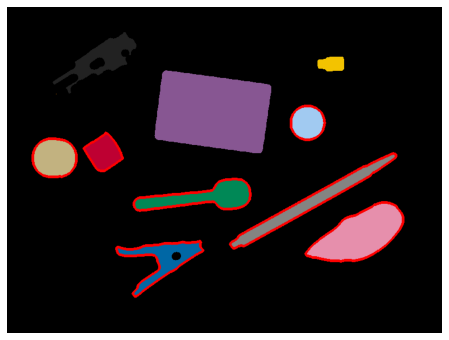

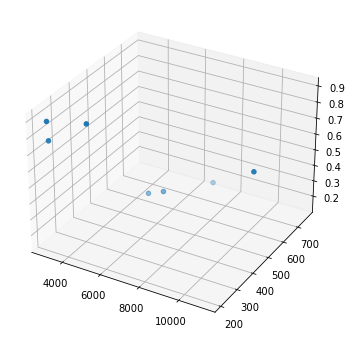

In [87]:
KELLY_COLORS = [
    'F2F3F4', '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032',
    'C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', '604E97',
    'F6A600', 'B3446C', 'DCD300', '882D17', '8DB600', '654522', 'E25822',
    '2B3D26'
]

def hex2rgb(hex):
    return tuple([int(hex[i:i + 2], 16) for i in (0, 2, 4)])


img_out = np.zeros(img_mp.shape + (3, ), dtype=np.uint8)
for idx in range(ret):
    if not idx:
        continue
    img_out[labels == idx] = hex2rgb(KELLY_COLORS[idx])

plt.axis('off')
plt.imshow(img_out, cmap='gray')
plt.show()

contours, _ = cv2.findContours(img_mp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
areas = []
perimeters = []
formfactors = []
for idx, contour in enumerate(contours):
    M = cv2.moments(contour)
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    print(f"area: {area}, perimeter: {perimeter}")
    if area <= 0:
        break
    areas.append(area)
    perimeters.append(perimeter)
    formfactors.append((4*np.pi*area) / (perimeter ** 2))
    cv2.drawContours(img_out, [contour], 0, (255, 0, 0), 3)
plt.axis('off')
plt.imshow(img_out)
plt.show()

cnt = len(areas)
map = np.zeros((cnt, cnt))
for i in range(cnt):
    for j in range(cnt):
        map[i, j] += ((areas[i] - areas[j]) ** 2) 
        map[i, j] += ((perimeters[i] - perimeters[j]) ** 2) 
        map[i, j] += ((formfactors[i] - formfactors[j]) ** 2) 
        map[i, j] = np.sqrt(map[i, j])


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(areas, perimeters, formfactors)

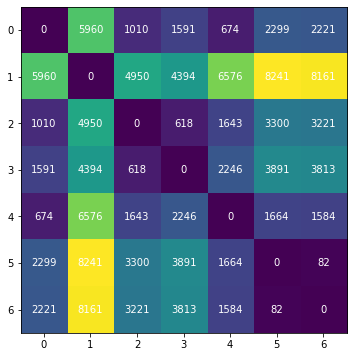

In [92]:
fig, ax = plt.subplots()
im = ax.imshow(map)
for i in range(cnt):
    for j in range(cnt):
        text = ax.text(j, i, int(map[i, j]),
                       ha="center", va="center", color="w")

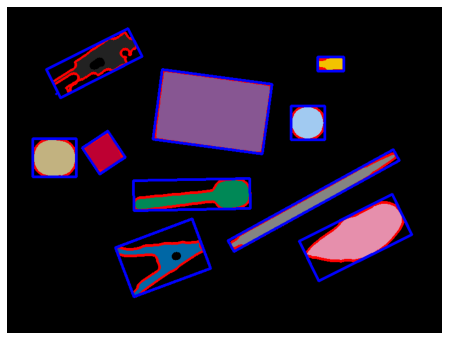

In [9]:
contours, _ = cv2.findContours(img_mp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for idx, contour in enumerate(contours):
    M = cv2.moments(contour)
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    cv2.drawContours(img_out, [np.int0(box)], 0, (0, 0, 255), 3)
    
plt.axis('off')
plt.imshow(img_out)
plt.show()

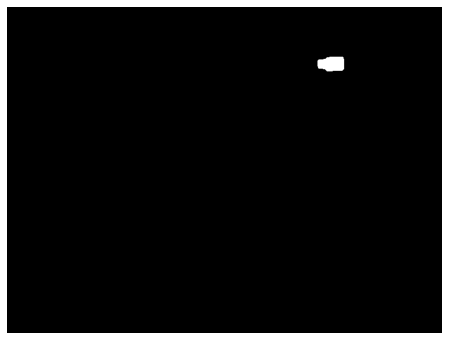

In [42]:
test = labels.copy()
test[test != 2] = 0
plt.axis('off')
plt.imshow(test, cmap='gray')
plt.show()

In [30]:
x,y = np.mgrid[:test.shape[0], :test.shape[1]]

In [40]:
# m00
m00 = np.sum(test)
m00

2260

In [38]:
# m01
m01 = np.sum(x*test)
m01

239188

In [39]:
# m10
m10 = np.sum(y*test)
m10

1349030

In [48]:
c = m01 // m00, m10 // m00
c

(105, 596)

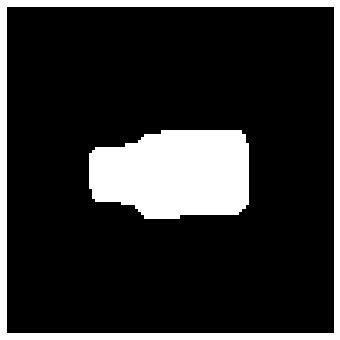

In [50]:
plt.axis('off')
plt.imshow(test[c[0] - 50:c[0] + 50, c[1] - 50:c[1] + 50], cmap='gray')
plt.show()

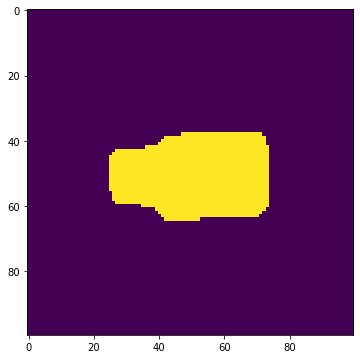

In [63]:
plt.imshow(t2)

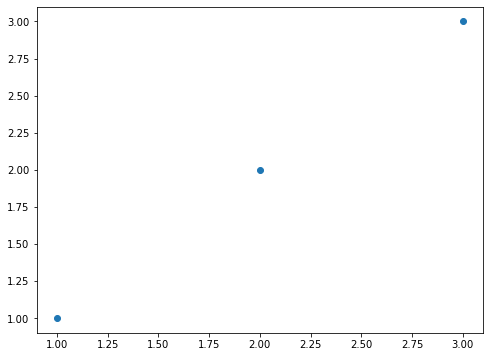

In [76]:
plt.scatter([1,2,3], [1,2,3])